In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=600, noise=0.13, random_state=992)
X = X.T

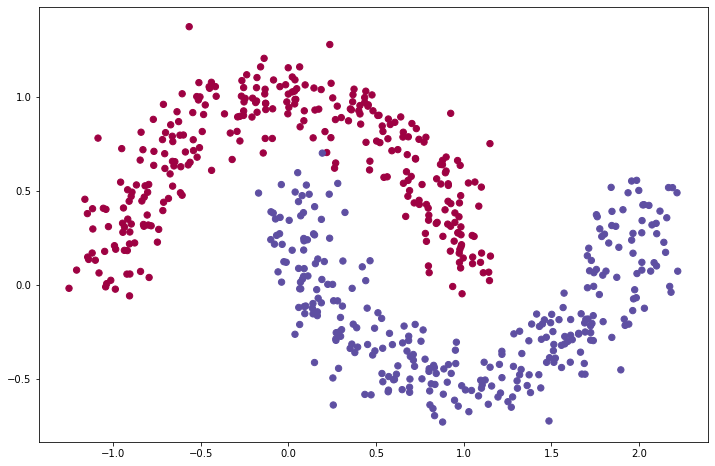

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(X[0,:], X[1,:], c=y, s=40, cmap=plt.cm.Spectral )

In [4]:
from sklearn.linear_model import LogisticRegressionCV

In [5]:
clf = LogisticRegressionCV()
clf.fit(X.T, np.squeeze(y))

LogisticRegressionCV()

In [6]:
def plot_decision_bondary(model, X,y):
  x_min, x_max = X[0,:].min() - 1, X[0,:].max() + 1
  y_min, y_max = X[1,:].min() - 1, X[1,:].max() + 1
  h = 0.01
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = model(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(12,8))
  plt.contourf(xx,yy, Z, cmap=plt.cm.Spectral)
  plt.ylabel('x2')
  plt.xlabel('x1')
  plt.scatter(X[0,:],X[1,:],s=40, c=y, cmap=plt.cm.Spectral)

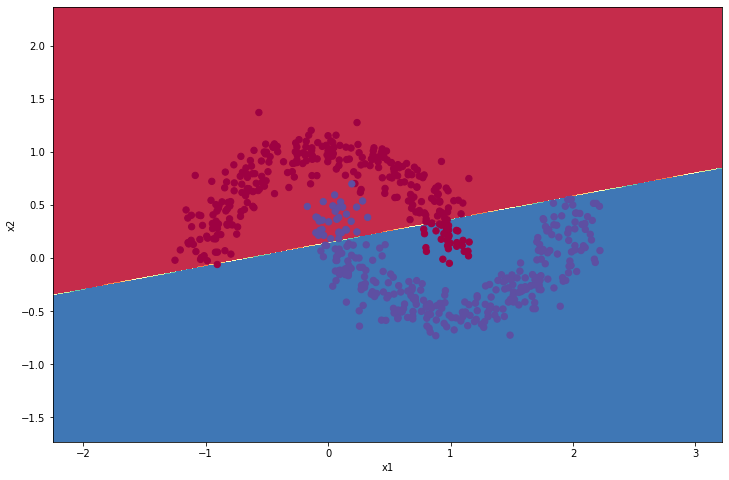

In [7]:
plot_decision_bondary(lambda x: clf.predict(x), X, y)

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(y, clf.predict(X.T))

0.885

In [10]:
def sigmoid(z):
  return (1 / (1 + np.exp(-z)))

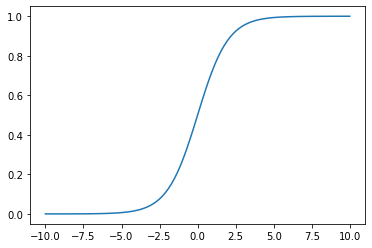

In [11]:
# verifying the sigmoid funcion in visualization
x = np.linspace(-10,10,100)
plt.plot(x, sigmoid(x))

In [12]:
def forward_propagation(X, parameters):
  W1 = parameters["W1"]
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']

  Z1 = W1 @ X + b1
  A1 = np.tanh(Z1)
  Z2 = W2 @ A1 + b2
  A2 = sigmoid(Z2)
  
  cache = {
      'Z1': Z1,
      'A1': A1,
      'Z2': Z2,
      'A2': A2
  }
  return cache

In [13]:
# seems not useful, only indicate the loss in the cost function
def cost_function(cache, y):
  A2 = cache['A2']
  m = A2.shape[-1]
  cost = (-1/m) * np.sum(np.multiply(y, np.log(A2)) + 
                         np.multiply((1-y), np.log(1- A2)))
  cost = float(np.squeeze(cost))
  return cost

In [14]:
X.shape

(2, 600)

In [15]:
def backward_propagation(parameters, cache, X,y):
  m = X.shape[1]
  W1 = parameters['W1']
  W2 = parameters['W2']

  Z1 = cache['Z1']
  A1 = cache['A1']
  Z2 = cache['Z2']
  A2 = cache['A2']

  dZ2 = A2 - y
  dW2 = (1/m) * (dZ2 @ A1.T)
  db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.multiply((W2.T @ dZ2), (1- np.power(A1, 2)))
  dW1 = (1/m) * (dZ1 @ X.T)
  db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
  grads = {
      'dW1': dW1,
      'dW2': dW2,
      'db1': db1,
      'db2': db2
  }
  return grads

In [16]:
def update_parameters(parameters, grads, learning_rate=0.1):
  W1,W2 = parameters['W1'], parameters['W2']
  b1,b2 = parameters['b1'], parameters['b2']

  dW1,dW2 = grads['dW1'], grads['dW2']
  db1,db2 = grads['db1'], grads['db2']

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

  parameters = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2
  }
  return parameters

In [17]:
# initialization
W1 = np.random.randn(4,2) * 0.01
b1 = np.zeros((4,1))
W2 = np.random.randn(1,4) * 0.01 + 0.5
b2 = np.zeros((1,1))

parameters = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2
}

In [18]:
for i in range(20000):
   cache = forward_propagation(X, parameters)
   cost = cost_function(cache, y)
   grads = backward_propagation(parameters, cache, X, y)
   parameters = update_parameters(parameters, grads, learning_rate=0.25)

   if i%1000 ==0: 
     print('#{}: cost={}'.format(i, cost))

#0: cost=0.6908723248220808
#1000: cost=0.2583357514256053
#2000: cost=0.25748819949358004
#3000: cost=0.25700633306645404
#4000: cost=0.2566908459116987
#5000: cost=0.2564604924630994
#6000: cost=0.25626960373533814
#7000: cost=0.2560720410716767
#8000: cost=0.2557819570501217
#9000: cost=0.2552415408214052
#10000: cost=0.2543226771237498
#11000: cost=0.25311459821515114
#12000: cost=0.2517913398520735
#13000: cost=0.25031657751901154
#14000: cost=0.24850866690339404
#15000: cost=0.24627536825627508
#16000: cost=0.24364766437443755
#17000: cost=0.2410795803214343
#18000: cost=0.23856178973646683
#19000: cost=0.16339379512406335


In [19]:
def predict(parameters, X):
  cache = forward_propagation(X, parameters)
  predictions = cache['A2']
  return np.round(predictions)

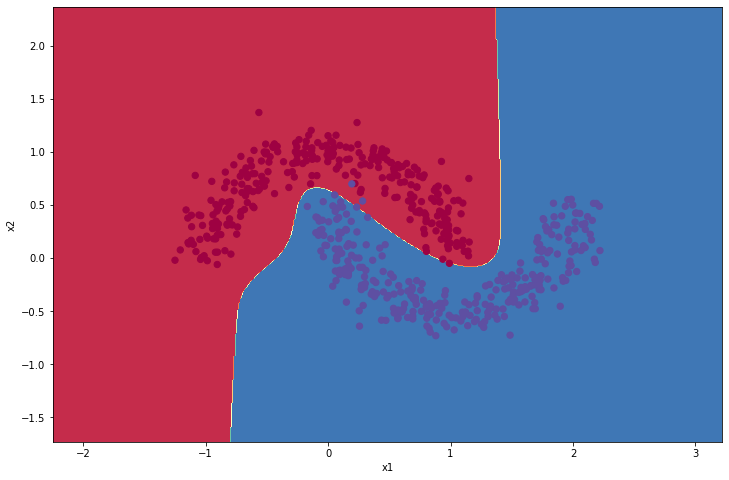

In [20]:
plot_decision_bondary(lambda x: predict(parameters,x.T),X,y)

In [21]:
y_pred = predict(parameters, X)
accuracy_score(y, np.squeeze(y_pred))

0.995